 **SENTIMENT ANALYSIS**

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from textblob import TextBlob

# Load the dataset

In [ ]:
file_path = '/content/narendramodi.csv'
tweets_df = pd.read_csv(file_path)

# Data Preprocessing: Clean tweet text


In [ ]:
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip()

tweets_df['cleaned_tweet'] = tweets_df['tweet'].astype(str).apply(clean_text)

# Label tweets with sentiment using TextBlob (for demonstration, providing labels here)

In [ ]:
def get_sentiment_label(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

tweets_df['sentiment'] = tweets_df['cleaned_tweet'].apply(get_sentiment_label)

# Plot sentiment distribution

<ipython-input-6-824674804fb0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=tweets_df, palette="viridis")


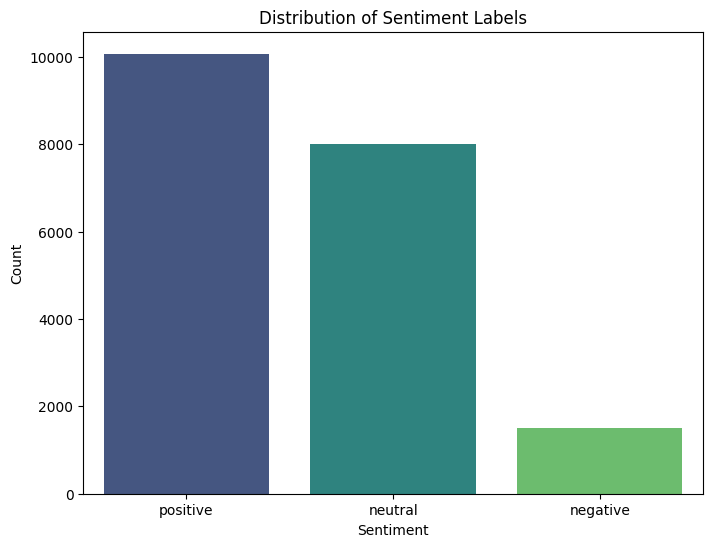

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=tweets_df, palette="viridis")
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Train and test split


In [ ]:
X = tweets_df['cleaned_tweet']
y = tweets_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text data to TF-IDF features


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Different models

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": LinearSVC(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}

model_metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

# Train each model, make predictions, and evaluate



Model: Logistic Regression


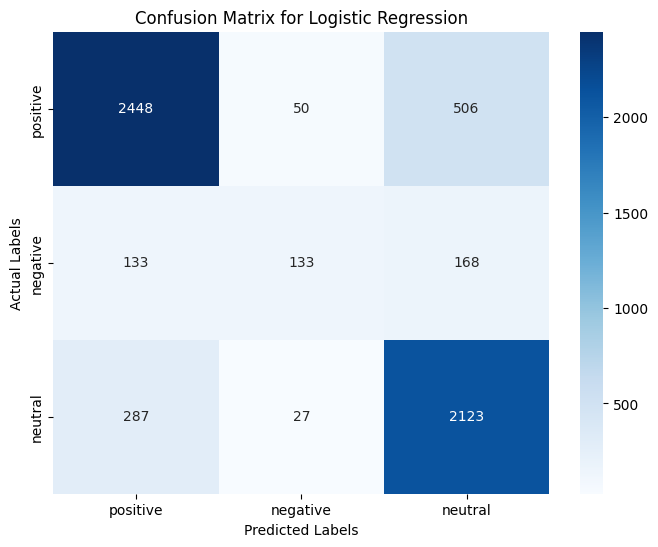


Model: Support Vector Machine


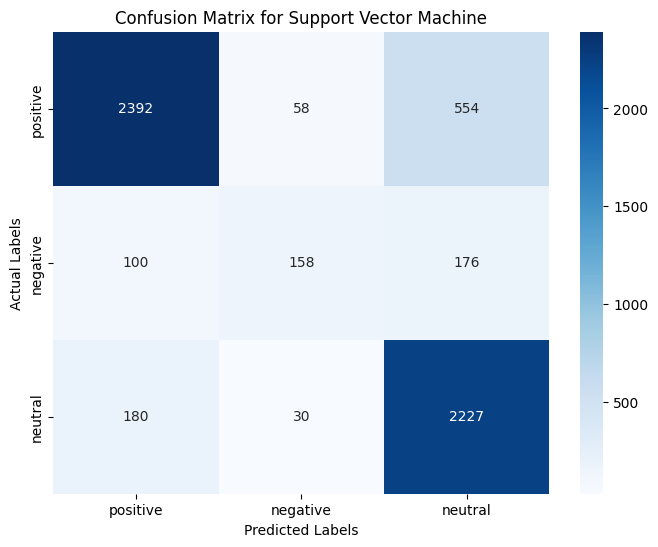


Model: Random Forest


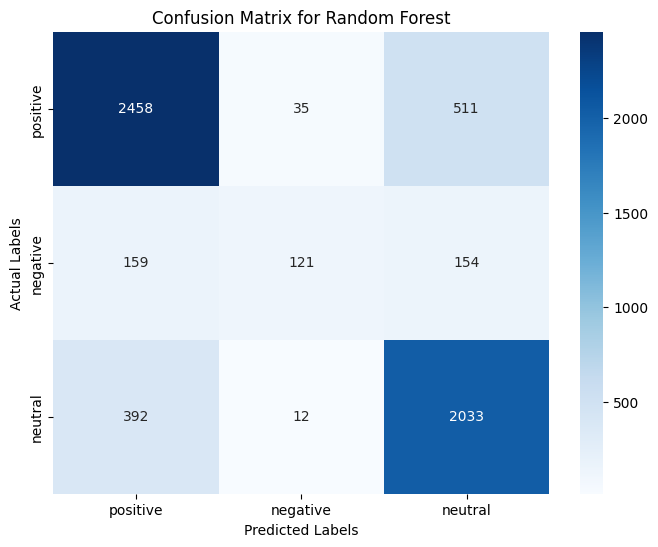


Model: Naive Bayes


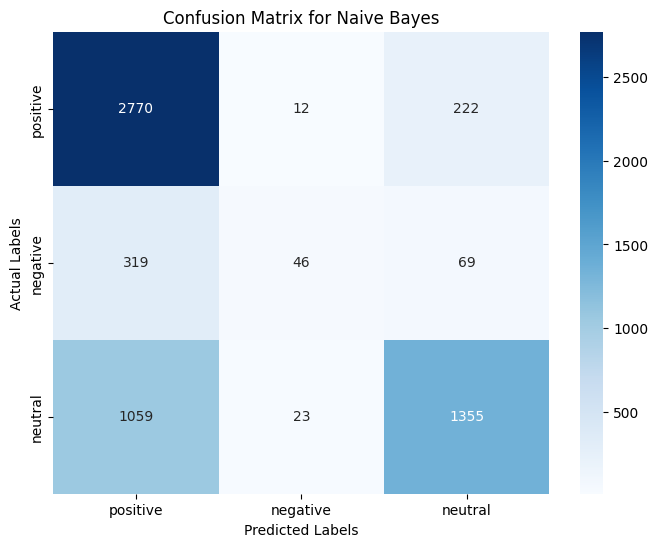

In [ ]:
for model_name, model in models.items():
    print(f"\nModel: {model_name}")

    # Train the model
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    model_metrics["Model"].append(model_name)
    model_metrics["Accuracy"].append(accuracy)
    model_metrics["Precision"].append(report['weighted avg']['precision'])
    model_metrics["Recall"].append(report['weighted avg']['recall'])
    model_metrics["F1-Score"].append(report['weighted avg']['f1-score'])

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative', 'neutral'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.show()

# Plot model comparison for Accuracy, Precision, Recall, F1-Score


<ipython-input-11-53e520555557>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=metrics_df, palette="viridis")


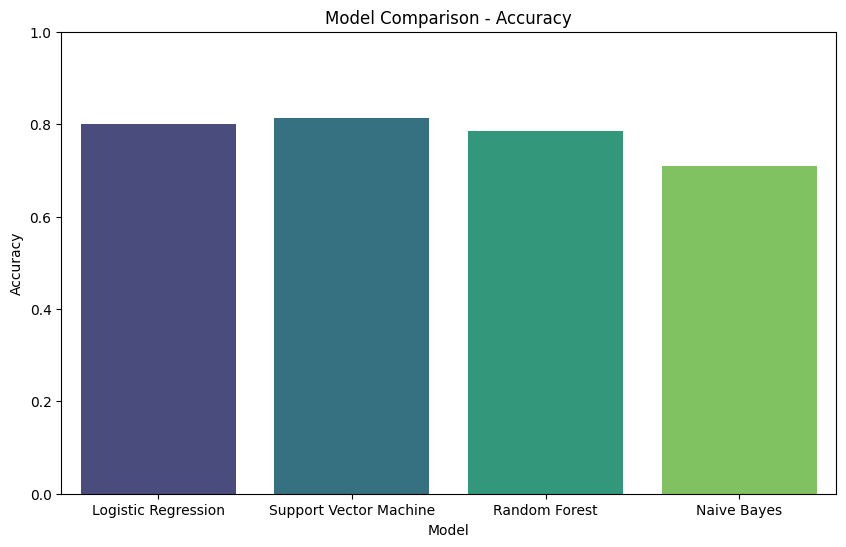

<ipython-input-11-53e520555557>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=metrics_df, palette="viridis")


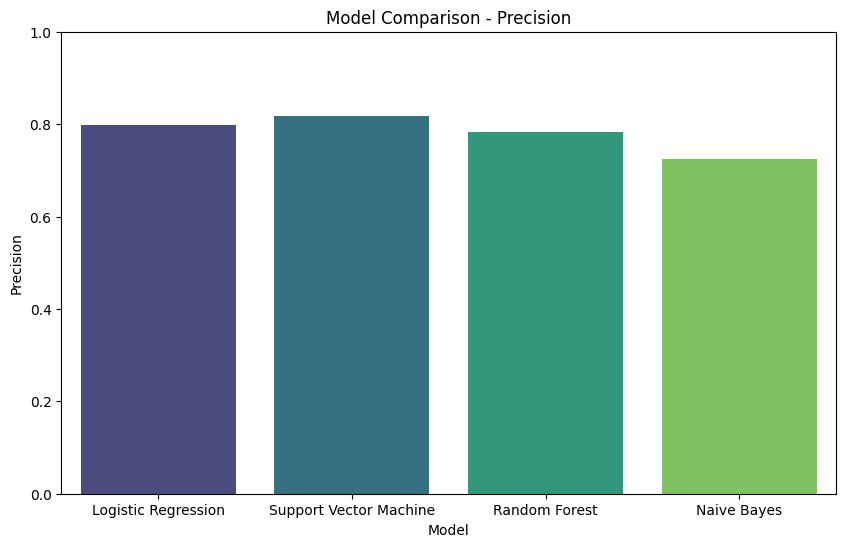

<ipython-input-11-53e520555557>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=metrics_df, palette="viridis")


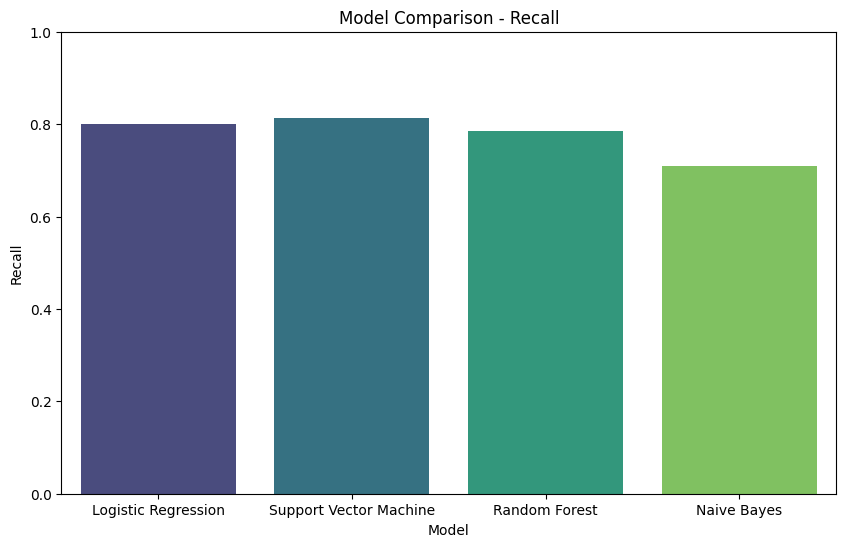

<ipython-input-11-53e520555557>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=metrics_df, palette="viridis")


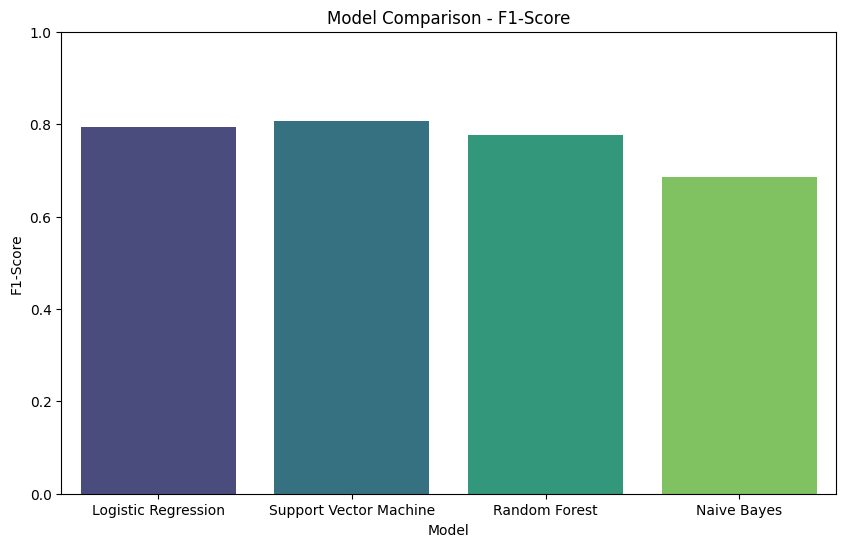

In [ ]:
metrics_df = pd.DataFrame(model_metrics)
for metric in ["Accuracy", "Precision", "Recall", "F1-Score"]:
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Model", y=metric, data=metrics_df, palette="viridis")
    plt.title(f"Model Comparison - {metric}")
    plt.ylim(0, 1)  # Set limit to [0, 1] for percentage metrics
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.show()

# Some tweets and their predictions





In [ ]:
sample_data = X_test.sample(10, random_state=42)  # Sample 10 random tweets
sample_predictions = models["Logistic Regression"].predict(tfidf_vectorizer.transform(sample_data))

print("\nSample Tweet Predictions:")
for tweet, pred in zip(sample_data, sample_predictions):
    print(f"Tweet: {tweet}\nPredicted Sentiment: {pred}\n")


Sample Tweet Predictions:
Tweet: to dedicate even one page to the subject of India’s security.
Predicted Sentiment: neutral

Tweet: Met Nobel laureate Kailash Satyarthi ji & congratulated him. pic.twitter.com/GTUyr24dfU
Predicted Sentiment: neutral

Tweet: Gujarat will never tolerate corruption. It is the state which ousted a Congress government through an anti-corruption movement in 1974.
Predicted Sentiment: neutral

Tweet: Saw immense enthusiasm at interactive meet by the Indian Merchants' Chamber & All India Business Council in Mumbai
Predicted Sentiment: neutral

Tweet: Young friends, compete with yourself and not others. MannKiBaat …
Predicted Sentiment: positive

Tweet: Many thanks for your wishes.
Predicted Sentiment: positive

Tweet: Invigorating our agriculture sector with latest technology will bring many benefits for our farmers, who work very hard to feed the nation.
Predicted Sentiment: positive

Tweet: Remembering the great Shyamji Krishna Varma on his Punya Tithi. Indi

# 2D Scatter Plot of Tweets with Sentiment Labels using PCA

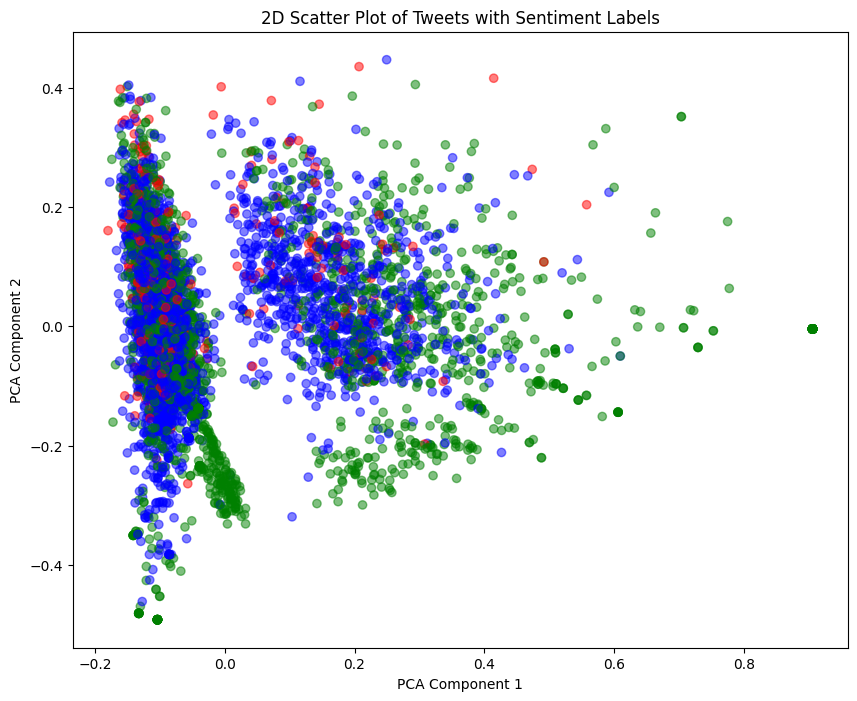

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_test_pca = pca.fit_transform(X_test_tfidf.toarray())
color_map = {'positive': 'blue', 'negative': 'red', 'neutral': 'green'}
colors = [color_map[label] for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=colors, alpha=0.5)
plt.title("2D Scatter Plot of Tweets with Sentiment Labels")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()